Week 3

Exercise:

Join kaggle.com and choose a real-world dataset. (This is part of your homework, try to do some research on Kaggle.)

Download the data of your choice.

Practice data cleaning and preprocessing, handle missing values, outliers etc.

Explore the basic statistics with pandas methods.

Create visualizations to understand the distribution of variables.

Identify correlations between variables using correlation matrices and/or heatmaps.

Derive insights from your analysis. What interesting patterns or trends did you discover?

Notes:

The goal is to gain insights into the data and present your findings through meaningful visualizations.

Document your analysis and include code comments to explain each step of the analysis.

Create visualizations with clear labels and titles.

Summarize your findings in a informative manner.

In [1]:
#define the library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Gathering Data

In [2]:
dataset_url = "C:/Users/avcil/projects/data-science/homeworks/data/housing_price_dataset.csv"

In [3]:
housing_price_dataset = pd.read_csv(dataset_url)

In [4]:
housing_price_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [5]:
housing_price_dataset.head(10)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
5,2095,2,3,Suburb,2020,198208.803907
6,2724,2,1,Suburb,1993,343429.319110
7,2044,4,3,Rural,1957,184992.321268
8,2638,4,3,Urban,1959,377998.588152
9,1121,5,2,Urban,2004,95961.926014


data tiplerini inceledik ve gördük ki sadece neighborhood sutunu object türünde.
urban = şehirli
suburb = kenar mahallede yaşayan
rural = köylü, kırsal bölgede yaşayan

In [6]:
print(f'Shape     : {housing_price_dataset.shape}\n'
      f'Size      : {housing_price_dataset.size}\n'
      f'Dimension : {housing_price_dataset.ndim}')


Shape     : (50000, 6)
Size      : 300000
Dimension : 2


In [7]:
#bos veri var mı diye kontrol ettim
housing_price_dataset.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [8]:
housing_price_dataset.duplicated().sum()
#yinelenen veri kontrolü

0

In [9]:
#sutun isimlerine eriştik 
housing_price_dataset.columns


Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')

# Exploratory Data Analysis & Preprocessing The Data

In [10]:
#sayısal sütunlar için hesaplanan temel istatistiklerin bir tablosu
#Bu tablo, her sütunun belirli bir istatistiksel özelliği temsil ettiği bir yapıya sahip
# Bu tür bir istatistiksel özet, veri analizi ve keşif aşamalarında verilerin anlaşılmasına yardımcı olabilir
housing_price_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
SquareFeet,50000.0,2006.374680,575.513241,1000.000000,1513.000000,2007.000000,2506.000000,2999.000000
Bedrooms,50000.0,3.498700,1.116326,2.000000,3.000000,3.000000,4.000000,5.000000
Bathrooms,50000.0,1.995420,0.815851,1.000000,1.000000,2.000000,3.000000,3.000000
YearBuilt,50000.0,1985.404420,20.719377,1950.000000,1967.000000,1985.000000,2003.000000,2021.000000
Price,50000.0,224827.325151,76141.842966,-36588.165397,169955.860225,225052.141166,279373.630052,492195.259972


In [11]:
#pric, yearbuilt,squarefeet, can not be 0 or negative. Convert them to nan
housing_price_dataset.loc[housing_price_dataset["Price"] <= 0 , "Price"] = np.nan
housing_price_dataset.loc[housing_price_dataset["SquareFeet"] <= 0 , "SquareFeet"] = np.nan
housing_price_dataset.loc[housing_price_dataset["YearBuilt"] <= 0 , "YearBuilt"] = np.nan

In [12]:
# We can add house age instead of using year built
housing_price_dataset["HouseAge"] = 2023 - housing_price_dataset["YearBuilt"]


In [13]:
#check the dataset
housing_price_dataset

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,HouseAge
0,2126.0,4,1,Rural,1969.0,215355.283618,54.0
1,2459.0,3,2,Rural,1980.0,195014.221626,43.0
2,1860.0,2,1,Suburb,1970.0,306891.012076,53.0
3,2294.0,2,1,Urban,1996.0,206786.787153,27.0
4,2130.0,5,2,Suburb,2001.0,272436.239065,22.0
...,...,...,...,...,...,...,...
49995,1282.0,5,3,Rural,1975.0,100080.865895,48.0
49996,2854.0,2,2,Suburb,1988.0,374507.656727,35.0
49997,2979.0,5,3,Suburb,1962.0,384110.555590,61.0
49998,2596.0,5,2,Rural,1984.0,380512.685957,39.0


In [14]:
# And delete the year built
housing_price_dataset = housing_price_dataset.drop(["YearBuilt"], axis = 1)

In [15]:
#check again
housing_price_dataset.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,Price,HouseAge
0,2126.0,4,1,Rural,215355.283618,54.0
1,2459.0,3,2,Rural,195014.221626,43.0
2,1860.0,2,1,Suburb,306891.012076,53.0
3,2294.0,2,1,Urban,206786.787153,27.0
4,2130.0,5,2,Suburb,272436.239065,22.0


# Data Visualization

buradan düzelt

SquareFeet	Bedrooms	Bathrooms	Neighborhood	Price	HouseAge

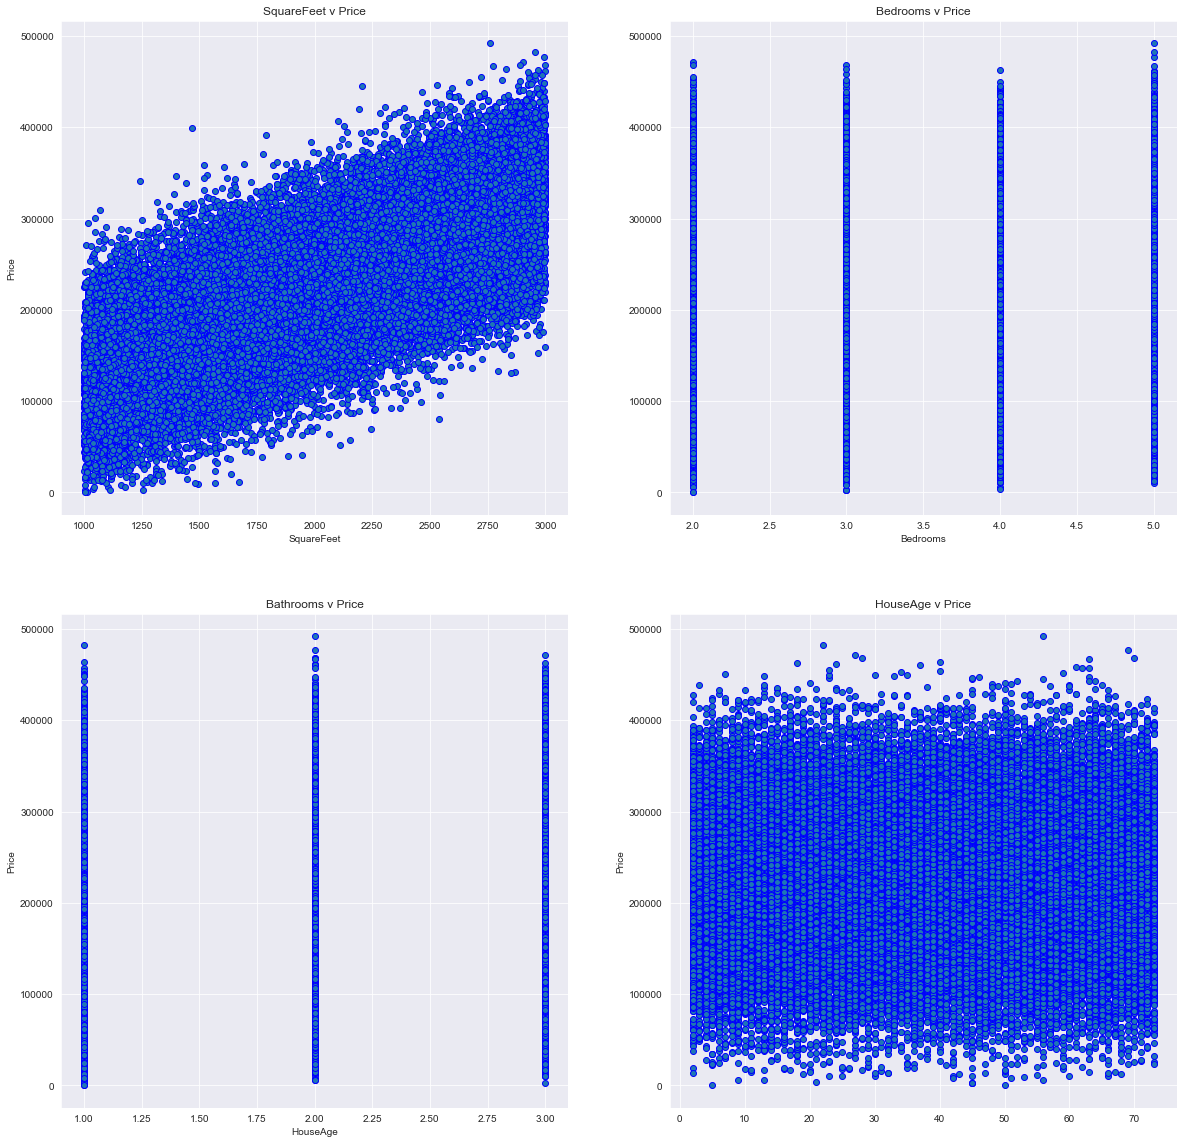

In [21]:
# Suplots of numeric features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (20,20))

# Plot [0,0]
axes[0,0].scatter(x = 'SquareFeet', y = 'Price', data = housing_price_dataset, edgecolor = 'b')
axes[0,0].set_xlabel('SquareFeet')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('SquareFeet v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Bedrooms', y = 'Price', data = housing_price_dataset, edgecolor = 'b')
axes[0,1].set_xlabel('Bedrooms')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Bedrooms v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathrooms', y = 'Price', data = housing_price_dataset, edgecolor = 'b')
axes[1,0].set_xlabel('Bathrooms')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathrooms v Price')
# Plot [1,1]
axes[1,1].scatter(x = 'HouseAge', y = 'Price', data = housing_price_dataset, edgecolor = 'b')
axes[1,0].set_xlabel('HouseAge')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('HouseAge v Price')



plt.show()

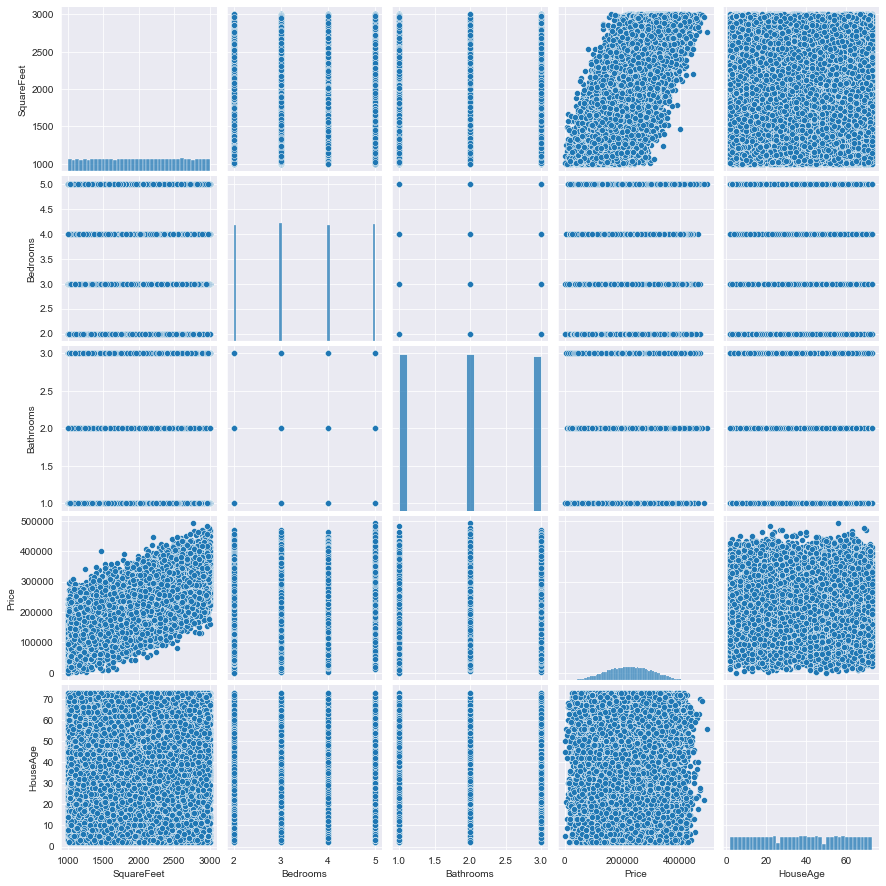

In [22]:
sns.pairplot(housing_price_dataset)

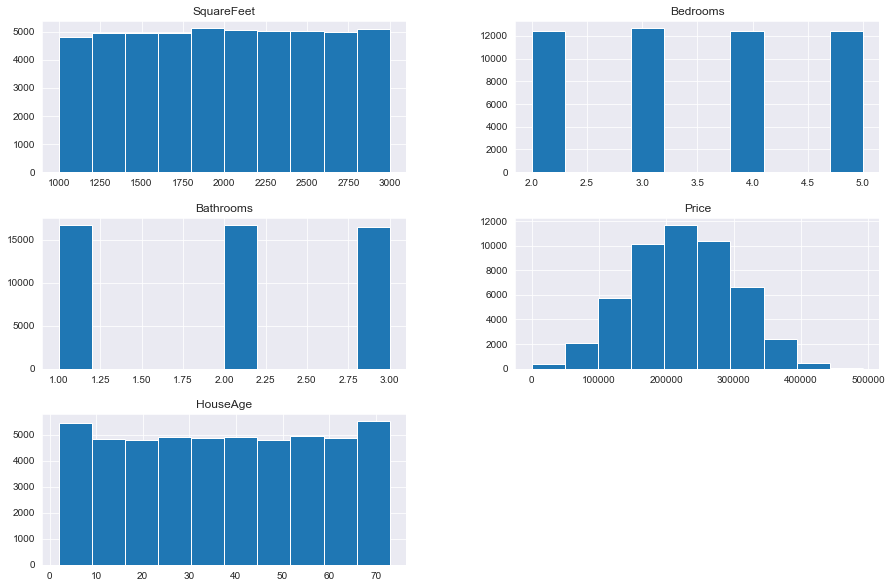

In [23]:
# Plot each numerical attribute
housing_price_dataset.hist(figsize=(15, 10))
plt.show()

Text(0.5, 1.0, 'Correlation')

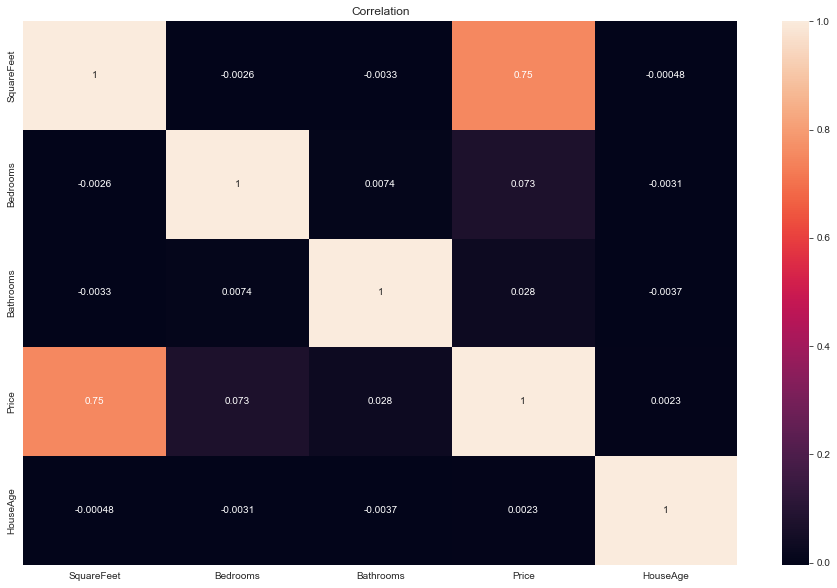

In [26]:
# Correlation Matrix
# Correlation Inspection
plt.figure(figsize=(16,10))
sns.heatmap(housing_price_dataset.corr(), annot= True)
plt.title('Correlation')





<AxesSubplot:ylabel='HouseAge'>

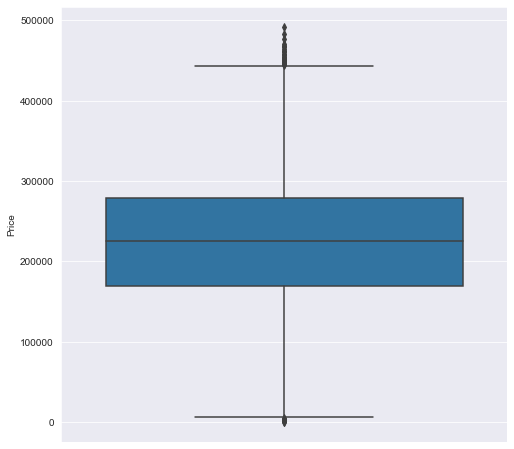

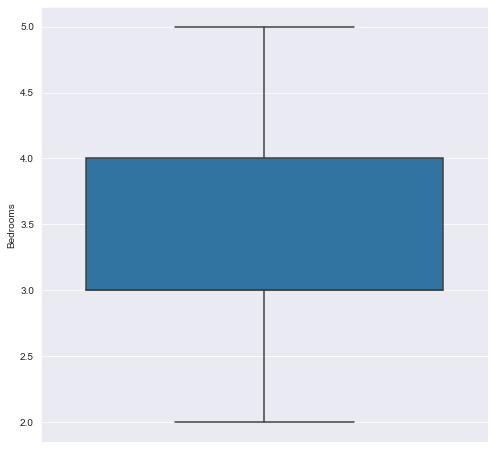

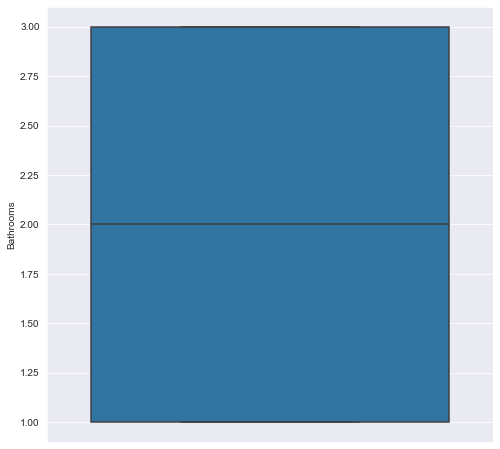

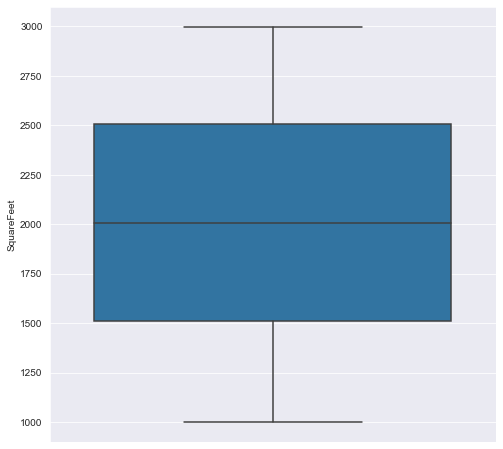

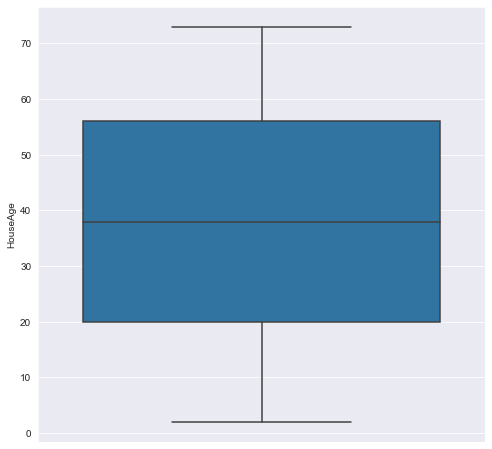

In [30]:

# Price boxplot
plt.figure(figsize=(8,8))
sns.boxplot(y="Price", data=housing_price_dataset)


# Bedrooms boxplot
plt.figure(figsize=(8,8))
sns.boxplot(y="Bedrooms", data=housing_price_dataset)


# Bathrooms boxplot
plt.figure(figsize=(8,8))
sns.boxplot(y="Bathrooms", data=housing_price_dataset)

# SquareFeet boxplot
plt.figure(figsize=(8,8))
sns.boxplot(y="SquareFeet", data=housing_price_dataset)

# HouseAge boxplot
plt.figure(figsize=(8,8))
sns.boxplot(y="HouseAge", data=housing_price_dataset)


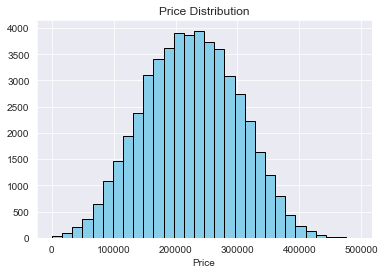

In [31]:

prices = housing_price_dataset['Price']

# Histogram
plt.hist(prices, bins=30, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.show()


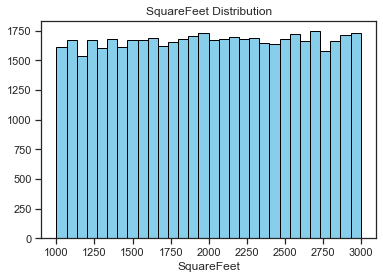

In [34]:

# Histogram
plt.hist(housing_price_dataset['SquareFeet'], bins=30, color='skyblue', edgecolor='black')
plt.title('SquareFeet Distribution')
plt.xlabel('SquareFeet')
plt.show()


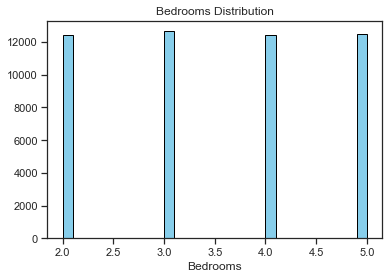

In [35]:

# Histogram
plt.hist(housing_price_dataset['Bedrooms'], bins=30, color='skyblue', edgecolor='black')
plt.title('Bedrooms Distribution')
plt.xlabel('Bedrooms')
plt.show()


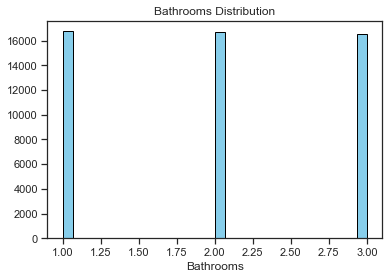

In [36]:

# Histogram
plt.hist(housing_price_dataset['Bathrooms'], bins=30, color='skyblue', edgecolor='black')
plt.title('Bathrooms Distribution')
plt.xlabel('Bathrooms')
plt.show()


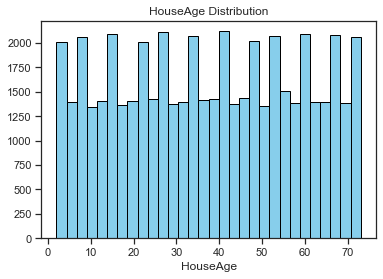

In [37]:

# Histogram
plt.hist(housing_price_dataset['HouseAge'], bins=30, color='skyblue', edgecolor='black')
plt.title('HouseAge Distribution')
plt.xlabel('HouseAge')
plt.show()


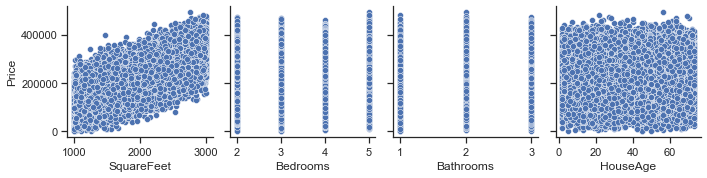

In [32]:

# Tüm sayısal değişkenleri seçtik (Fiyat sütununu hariç)
num_cols = housing_price_dataset.select_dtypes(include=['number']).drop(columns=['Price'])

# Tüm sayısal değişkenlerle Fiyat arasındaki ilişki için
sns.set(style='ticks')
sns.pairplot(data=housing_price_dataset, x_vars=num_cols.columns, y_vars=['Price'])
plt.show()

